In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file_path = 'StudentsPerformance.csv'
df = pd.read_csv(file_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape


(1000, 8)

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

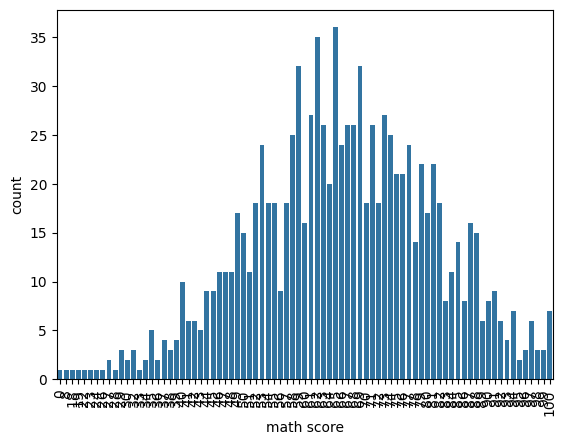

In [6]:
p = sns.countplot(x="math score", data=df)
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [7]:
passmark=50
df["Math_PassStatus"]=np.where(df["math score"]<passmark,"F","P")
df.Math_PassStatus.value_counts()

Math_PassStatus
P    865
F    135
Name: count, dtype: int64

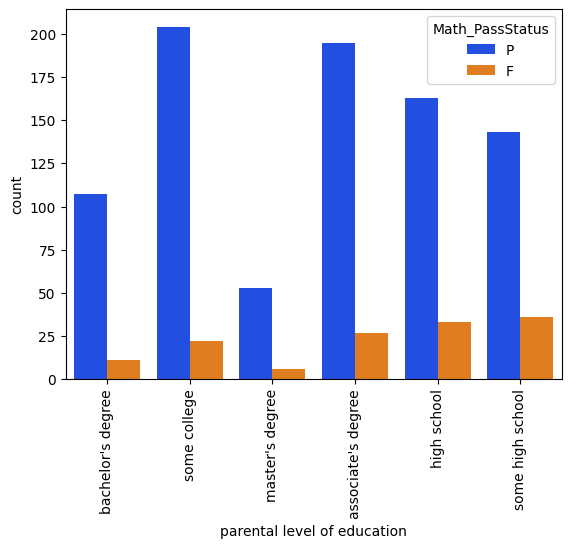

In [8]:
p = sns.countplot(x="parental level of education", data=df,hue="Math_PassStatus",palette="bright")
_=plt.setp(p.get_xticklabels(),rotation=90)

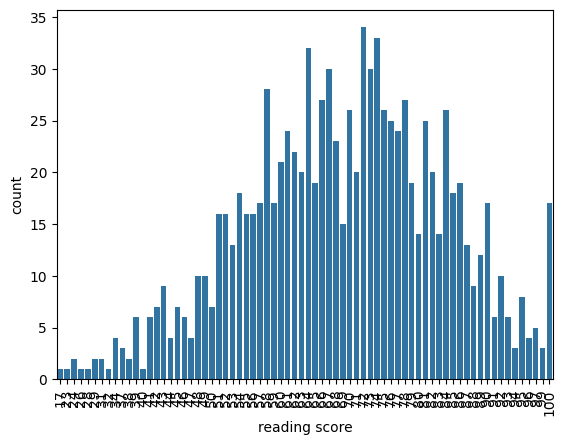

In [9]:
p = sns.countplot(x="reading score", data=df)
_=plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [10]:
df["Reading_PassStatus"]=np.where(df["reading score"]<passmark,"F","P")
df.Reading_PassStatus.value_counts()

Reading_PassStatus
P    910
F     90
Name: count, dtype: int64

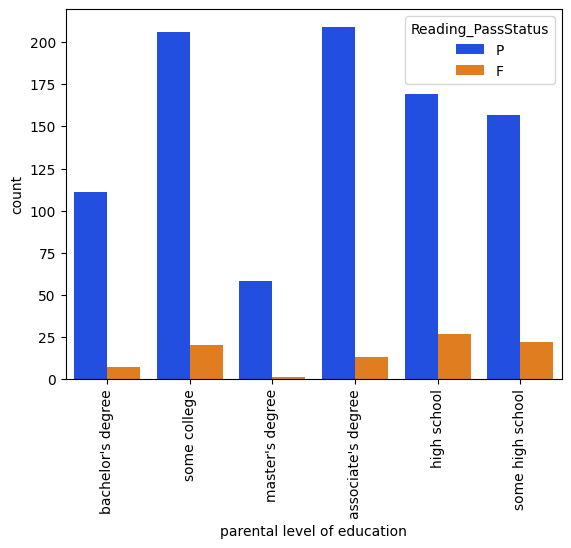

In [11]:
p = sns.countplot(x="parental level of education", data=df,hue="Reading_PassStatus",palette="bright")
_=plt.setp(p.get_xticklabels(), rotation=90)


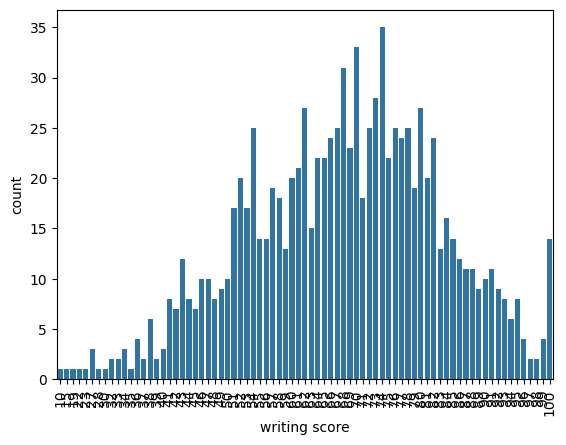

In [12]:
p = sns.countplot(x="writing score", data=df)
_=plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [13]:
df["WritingPassStatus"]=np.where(df["writing score"]<passmark,"F","P")
df.WritingPassStatus.value_counts()

WritingPassStatus
P    886
F    114
Name: count, dtype: int64

In [14]:
df["OverAll_PassStatus"] = df.apply(lambda x: "F" if x["Math_PassStatus"] == "F" or x["Reading_PassStatus"] == "F" else "P", axis=1)
df.OverAll_PassStatus.value_counts()


OverAll_PassStatus
P    834
F    166
Name: count, dtype: int64

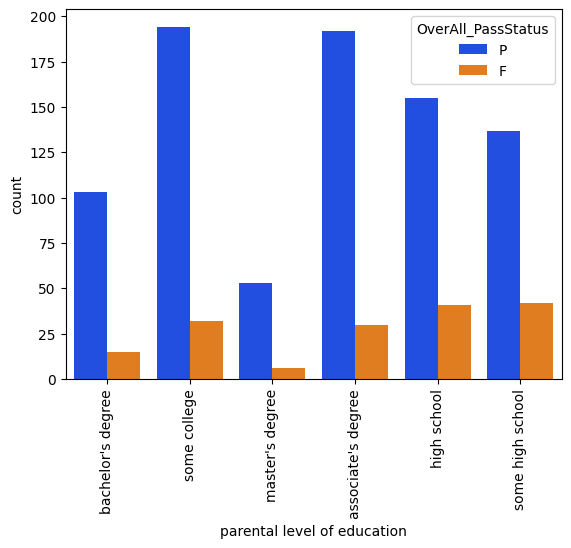

In [15]:
p = sns.countplot(x="parental level of education", data=df,hue="OverAll_PassStatus",palette="bright")
_=plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,WritingPassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,P


In [17]:
df["Total_Makrs"]=df["math score"]+df["reading score"]+df["writing score"]

In [18]:
df["Percentage"]=df["Total_Makrs"]/3

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,WritingPassStatus,OverAll_PassStatus,Total_Makrs,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333


/var/folders/9f/djzxb30913vcldy7q7c_3_qh0000gn/T/ipykernel_89554/57977282.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="Percentage", data=df,palette="muted")


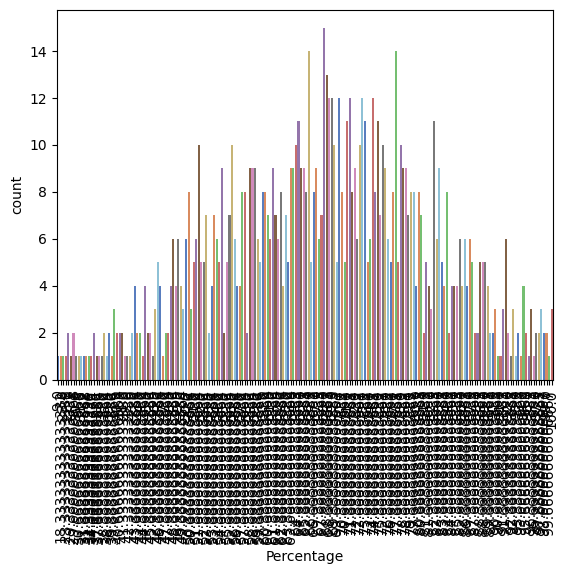

In [20]:
p = sns.countplot(x="Percentage", data=df,palette="muted")
_=plt.setp(p.get_xticklabels(), rotation=90)
plt.show()


In [21]:
def GetGrade(Percentage, OverAll_PassStatus):
    if OverAll_PassStatus == 'F':
        return 'F'
    if Percentage >= 80:
        return 'A'
    if Percentage >= 70:
        return 'B'
    if Percentage >= 60:
        return 'C'
    if Percentage >= 50:
        return 'D'
    if Percentage >= 40:
        return 'E'
    else:
        return 'F'

df['Grade'] = df.apply(lambda x: GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)
df.Grade.value_counts()


Grade
B    261
C    255
A    198
F    166
D    116
E      4
Name: count, dtype: int64

/var/folders/9f/djzxb30913vcldy7q7c_3_qh0000gn/T/ipykernel_89554/1619559014.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Grade",data=df,order=["A","B","C","D","E","F"],palette="muted")


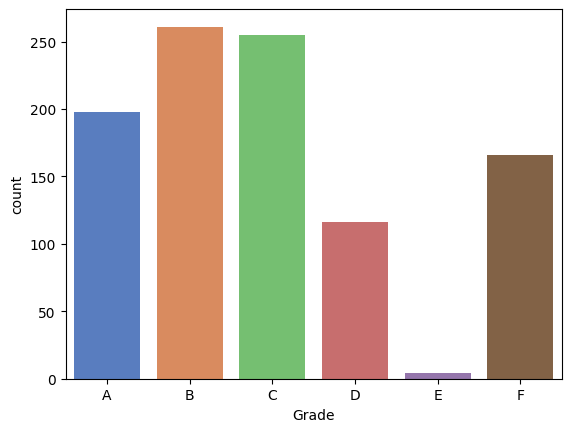

In [22]:
sns.countplot(x="Grade",data=df,order=["A","B","C","D","E","F"],palette="muted")
plt.show()

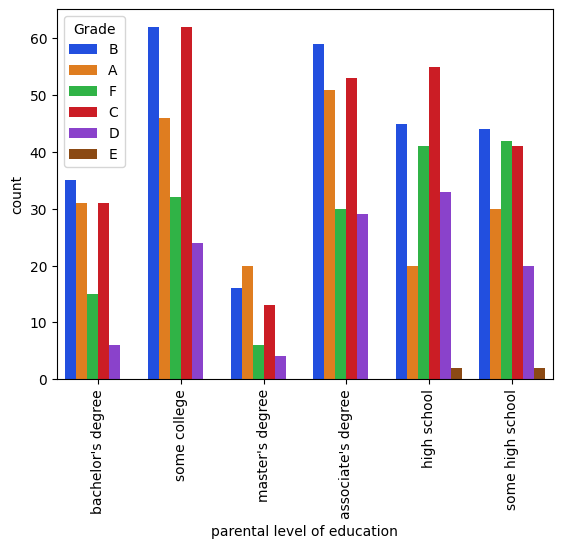

In [23]:
p = sns.countplot(x="parental level of education",data=df,hue="Grade",palette="bright")
_=plt.setp(p.get_xticklabels(), rotation=90)


In [24]:
df_gender=df["gender"]
female_count=df_gender.value_counts()["female"]
male_count=df_gender.value_counts()["male"]

In [25]:
female_ratio=female_count/(female_count+male_count)*100
male_ratio=male_count/(female_count+male_count)*100

In [26]:
print("Kız Sayısı",female_ratio)
print("Erkek Sayısı",male_ratio)

Kız Sayısı 51.800000000000004
Erkek Sayısı 48.199999999999996


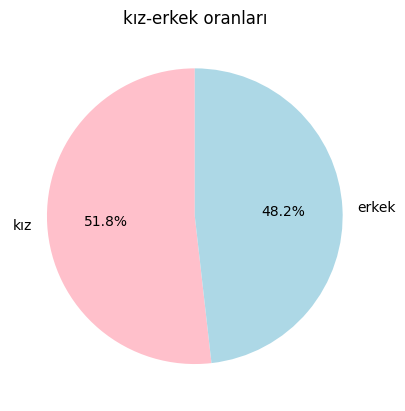

In [27]:
labels=["kız","erkek"]
sizes=[female_ratio,male_ratio]
colors=["pink","lightblue"]
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%",startangle=90)

plt.axis
plt.title("kız-erkek oranları")
plt.show()

In [28]:
df_female=df[df["gender"]=="female"]
df_male=df[df["gender"]=="male"]

female_math_mean=df_female["math score"].mean()
male_math_mean=df_male["math score"].mean()

female_to_male_math_ratio=female_math_mean/male_math_mean

print("kızların erkeklere oranı",female_to_male_math_ratio)

kızların erkeklere oranı 0.9258672573189434


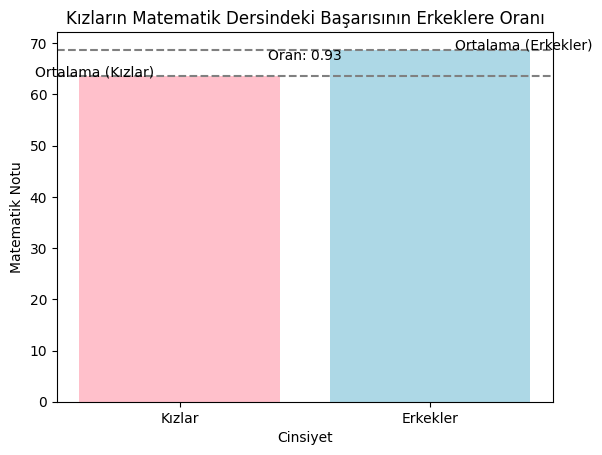

In [29]:

labels = ["Kızlar", "Erkekler"]
values = [female_math_mean, male_math_mean]
colors = ["pink", "lightblue"]


plt.bar(labels, values, color=colors)


plt.axhline(y=male_math_mean, color="gray", linestyle="--")
plt.text(1.1, male_math_mean, "Ortalama (Erkekler)", ha="left")

plt.axhline(y=female_math_mean, color="gray", linestyle="--")
plt.text(-0.1, female_math_mean, "Ortalama (Kızlar)", ha="right")

plt.text(0.5, female_math_mean * 1.05, "Oran: {:.2f}".format(female_to_male_math_ratio), ha="center")


plt.xlabel("Cinsiyet")
plt.ylabel("Matematik Notu")
plt.title("Kızların Matematik Dersindeki Başarısının Erkeklere Oranı")


plt.show()


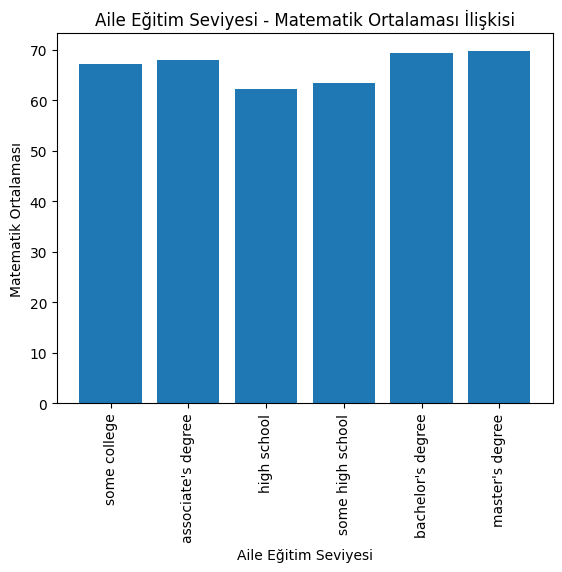

In [30]:


parental_edu_counts = df["parental level of education"].value_counts()
parental_edu_levels = parental_edu_counts.index.tolist()


math_scores = []
for level in parental_edu_levels:
    math_scores.append(df[df["parental level of education"] == level]["math score"].mean())


plt.bar(parental_edu_levels, math_scores)
plt.xlabel("Aile Eğitim Seviyesi")
plt.ylabel("Matematik Ortalaması")
plt.title("Aile Eğitim Seviyesi - Matematik Ortalaması İlişkisi")


plt.xticks(rotation=90)

plt.show()


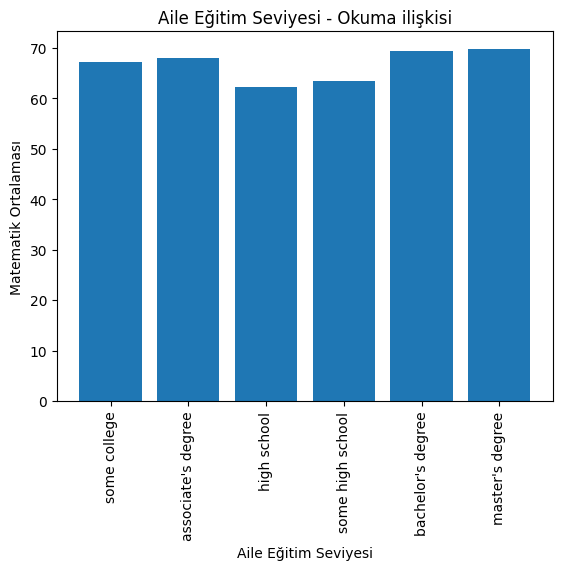

In [31]:


parental_edu_counts = df["parental level of education"].value_counts()
parental_edu_levels = parental_edu_counts.index.tolist()


reading_scores = []
for level in parental_edu_levels:
    reading_scores.append(df[df["parental level of education"] == level]["reading score"].mean())


plt.bar(parental_edu_levels, math_scores)
plt.xlabel("Aile Eğitim Seviyesi")
plt.ylabel("Matematik Ortalaması")
plt.title("Aile Eğitim Seviyesi - Okuma ilişkisi")


plt.xticks(rotation=90)

plt.show()


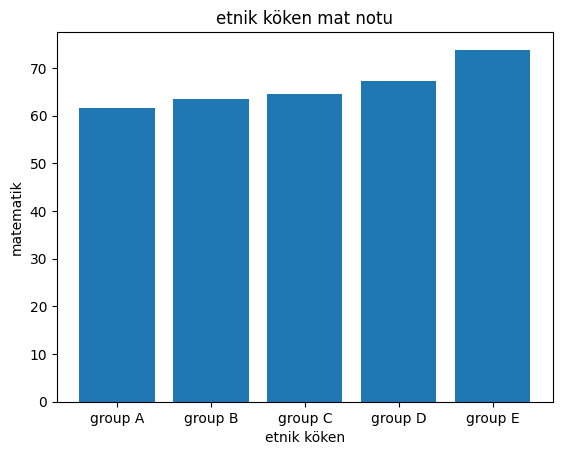

In [32]:
ethnic=df.groupby("race/ethnicity")["math score"].mean().reset_index()
plt.bar(ethnic["race/ethnicity"],ethnic["math score"])
plt.title("etnik köken mat notu")
plt.xlabel("etnik köken")
plt.ylabel("matematik")

plt.show()

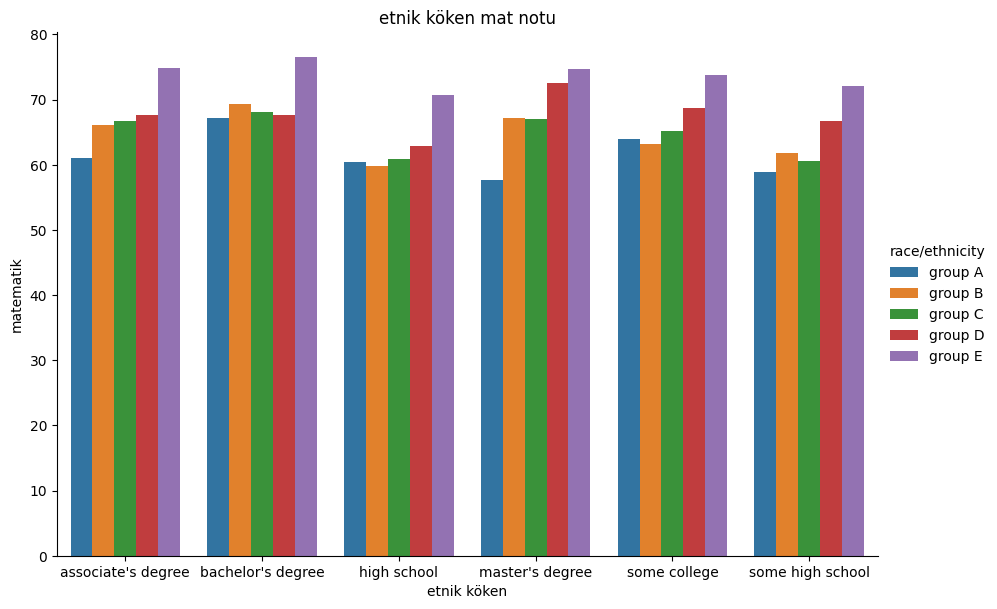

In [33]:
ethnic=df.groupby(["race/ethnicity","parental level of education"])["math score"].mean().reset_index()
sns.catplot(x="parental level of education",y="math score",hue="race/ethnicity",kind="bar",data=ethnic,height=6,aspect=1.5)

plt.title("etnik köken mat notu")
plt.xlabel("etnik köken")
plt.ylabel("matematik")

plt.show()

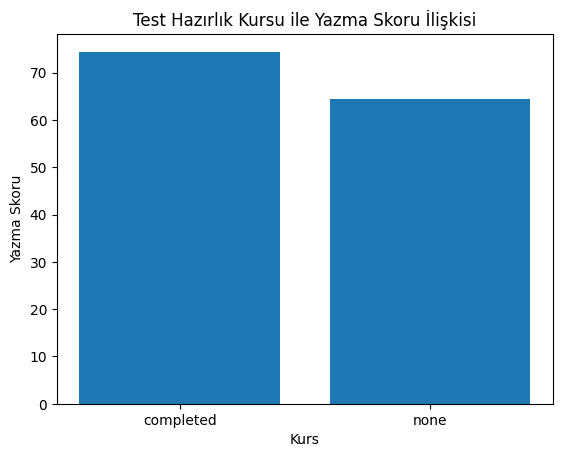

In [34]:
grup = df.groupby("test preparation course")["writing score"].mean()

plt.bar(grup.index, grup.values)
plt.title("Test Hazırlık Kursu ile Yazma Skoru İlişkisi")
plt.xlabel("Kurs")
plt.ylabel("Yazma Skoru")

plt.show()
